In [5]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
questions_per_lib = pd\
  .read_csv('/content/drive/MyDrive/lab5-datamining/stackoverflow.csv',
            parse_dates=True,
            index_col='creation_date',
            )\
            .loc[:,'pandas': 'bokeh']\
            .resample('1M')\
            .sum()\
            .cumsum()\
            .reindex(pd.date_range('2008-08', '2021-10', freq='M'))\
            .fillna(0)



In [8]:
questions_per_lib.tail(10)

pandas  matplotlib    numpy  seaborn  geopandas  geoviews  \
2020-12-31  179033.0     53164.0  83113.0   5887.0     1192.0      50.0   
2021-01-31  183002.0     54076.0  84367.0   6103.0     1231.0      53.0   
2021-02-28  187192.0     55005.0  85626.0   6265.0     1287.0      53.0   
2021-03-31  192182.0     56024.0  87145.0   6472.0     1336.0      54.0   
2021-04-30  196517.0     57029.0  88496.0   6681.0     1398.0      54.0   
2021-05-31  200734.0     57853.0  89812.0   6855.0     1456.0      57.0   
2021-06-30  205065.0     58602.0  91026.0   7021.0     1522.0      57.0   
2021-07-31  209235.0     59428.0  92254.0   7174.0     1579.0      62.0   
2021-08-31  213410.0     60250.0  93349.0   7344.0     1631.0      62.0   
2021-09-30  214919.0     60554.0  93797.0   7414.0     1652.0      63.0   

            altair  yellowbrick   vega  holoviews  hvplot   bokeh  
2020-12-31   565.0         34.0  459.0      466.0    76.0  4018.0  
2021-01-31   596.0         37.0  474.0      481.0    79.0  4064.0  
2021-02-28   626.0         38.0  485.0      486.0    81.0  4112.0  
2021-03-31   657.0         39.0  501.0      498.0    82.0  4174.0  
2021-04-30   685.0         43.0  518.0      505.0    84.0  4233.0  
2021-05-31   716.0         46.0  532.0      513.0    84.0  4270.0  
2021-06-30   760.0         48.0  557.0      521.0    88.0  4308.0  
2021-07-31   781.0         50.0  572.0      528.0    89.0  4341.0  
2021-08-31   797.0         52.0  589.0      541.0    92.0  4372.0  
2021-09-30   804.0         54.0  598.0      542.0    92.0  4386.0

In [12]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from matplotlib import ticker

def bar_plot(data):
  fig,ax = plt.subplots(figsize=(8,6))
  sort_order = data.last('1M').squeeze().sort_values().index
  bars = [bar.set_label(label) for label, bar in 
          zip(sort_order, 
              ax.barh(sort_order, 
               [0] * data.shape[1]))
          ]
  ax.set_xlabel('total questions', fontweight='bold')
  ax.set_xlim(0, 250_000)
  ax.xaxis.set_major_formatter(ticker.EngFormatter())
  ax.xaxis.set_tick_params(labelsize=12)
  ax.yaxis.set_tick_params(labelsize=12)

  for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

  fig.tight_layout()

  return fig, ax            

(<Figure size 800x600 with 1 Axes>, <Axes: xlabel='total questions'>)

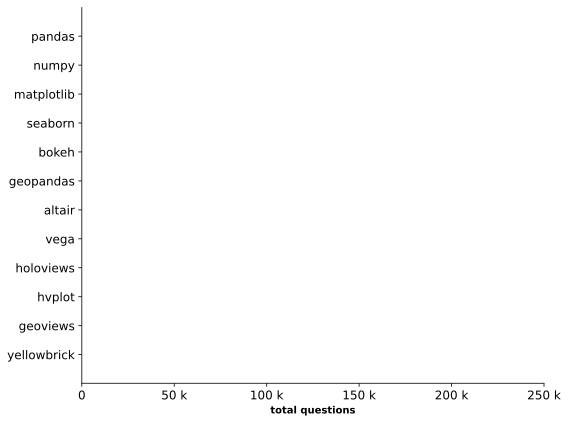

In [13]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
bar_plot(questions_per_lib)

In [16]:
def generate_plot_text(ax):
  annot = [
      ax.annotate(
          '', xy=(0, bar.get_y() + bar.get_height()/2), 
          ha='left', va='center'
      ) for bar in ax.patches
  ]
  time_text = ax.text(
      0.9, 0.1, '', transform=ax.transAxes,
      fontsize=15, ha='center', va='center'
  )
  return annot, time_text

In [21]:
def update(frame, *, ax, df, annotations, time_text):
  data = df.loc[frame, :]

  for rect, text in zip(ax.patches, annotations):
    col = rect.get_label()
    if data[col]:
      rect.set_width(data[col])
      text.set_x(data[col])
      text.set_text(f'{data[col]:,.0f}')

    time_text.set_text(frame.strftime('%b\n%Y'))

In [22]:
from functools import partial

def bar_plot_init(df):
  fig, ax = bar_plot(df)
  annots, time_text = generate_plot_text(ax)
  bar_plot_update = partial(
      update, ax = ax, df=df, annotations=annots, time_text=time_text
  )

  return fig, bar_plot_update

In [23]:
fig, update_func = bar_plot_init(questions_per_lib)

ani = FuncAnimation(
    fig, update_func, frames=questions_per_lib.index, repeat=False
)

ani.save('/content/drive/MyDrive/lab5-datamining/sof_questions_animation.mp4',
         writer='ffmpeg', fps=10, bitrate=100, dpi=300)

plt.close()

In [24]:
from IPython import display

display.Video(
    '/content/drive/MyDrive/lab5-datamining/sof_questions_animation.mp4', width=600, height=400,
    embed=True, html_attributes='controls muted autoplay'
)

In [25]:
subway = pd.read_csv(
    '/content/drive/MyDrive/lab5-datamining/NYC_subway_daily.csv',
    parse_dates=['Datetime'],
    index_col=['Borough', 'Datetime']
)

subway_daily = subway.unstack(0)
subway_daily.head()

Entries                                    Exits            \
Borough            Bk        Bx          M         Q        Bk        Bx   
Datetime                                                                   
2017-02-04   617650.0  247539.0  1390496.0  408736.0  417449.0  148237.0   
2017-02-05   542667.0  199078.0  1232537.0  339716.0  405607.0  139856.0   
2017-02-06  1184916.0  472846.0  2774016.0  787206.0  761166.0  267991.0   
2017-02-07  1192638.0  470573.0  2892462.0  790557.0  763653.0  270007.0   
2017-02-08  1243658.0  497412.0  2998897.0  825679.0  788356.0  275695.0   

                                 
Borough             M         Q  
Datetime                         
2017-02-04  1225689.0  279699.0  
2017-02-05  1033610.0  268626.0  
2017-02-06  2240027.0  537780.0  
2017-02-07  2325024.0  544828.0  
2017-02-08  2389534.0  559639.0

In [26]:
mht_entries = subway_daily['Entries']['M']

In [31]:
import numpy as np
ctn_per_bin, bin_ranges = np.histogram(mht_entries, bins=30)

In [44]:
def subway_histogram(data, bins, date_range):
  _, bin_ranges = np.histogram(data, bins=bins)

  weekday_mask = data.index.weekday < 5
  configs = [
      {'label': 'Weekend', 'mask': ~weekday_mask, 'ymax': 60},
      {'label': 'Weekday', 'mask': weekday_mask, 'ymax': 120}
  ]

  fig, axs = plt.subplots(1,2, figsize=(8,4), sharex=True)
  for ax, config in zip(axs, configs):
    _, _, config['hist'] = ax.hist(
        data[config['mask']].loc[date_range], bin_ranges, ec='black'
    )
    ax.xaxis.set_major_formatter(ticker.EngFormatter())
    ax.set(
        xlim=(0, None), ylim=(0, config['ymax']),
        xlabel=f'{config["label"]} Entries'
    )
    for spine in ['top', 'right']:
      ax.spines[spine].set_visible(False)

  axs[0].set_ylabel('Frequency')
  fig.suptitle('Histogram of Daily subway entries in Manhattan')
  fig.tight_layout()

  return fig, axs, bin_ranges, configs

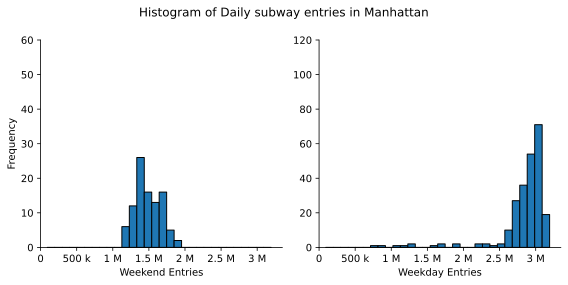

In [45]:
_ = subway_histogram(mht_entries, bins=30, date_range='2017')

In [49]:
def add_time_text(ax):
  time_text = ax.text(
      0.15, 0.9, '', transform=ax.transAxes,
      fontsize=15, ha='center', va='center'
  )
  return time_text

In [46]:
def update(frame, *, data, configs, time_text, bin_ranges):
  artists = []
  time = frame.strftime('%b\n%Y')
  if time != time_text.get_text():
    time_text.set_text(time)
    artists.append(time_text)

  for config in configs:
    time_frame_mask = \
      (data.index > frame - pd.Timedelta(days=365)) & \
      (data.index <= frame)
    counts, _ = np.histogram(
        data[time_frame_mask & config['mask']],
        bin_ranges
    )
    for count, rect in zip(counts, config['hist'].patches):
      if count != rect.get_height():
        rect.set_height(count)
        artists.append(rect)
  return artists

In [47]:
def histogram_init(data, bins, init_date_range):
  fig, axs, bin_ranges, configs = subway_histogram(data, bins, init_date_range)

  update_func = partial(
      update, data=data, configs=configs,
      time_text = add_time_text(axs[0]),
      bin_ranges=bin_ranges
  )

  return fig, update_func

In [50]:
fig, update_func = histogram_init(
    mht_entries, bins=30, init_date_range=slice('2017', '2019-7')
)

ani = FuncAnimation(
    fig, update_func, frames=mht_entries['2019-08': '2021'].index,
    repeat=False, blit=True
)

ani.save(
    '/content/drive/MyDrive/lab5-datamining/subway_entries_subplots.mp4',
    writer='ffmpeg', fps=30, bitrate=500, dpi=300
)

plt.close()

In [51]:
from IPython import display

display.Video(
    '/content/drive/MyDrive/lab5-datamining/subway_entries_subplots.mp4', width=600, height=400,
    embed=True, html_attributes='controls muted autoplay'
)

In [2]:
!pip install geopandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 88.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 121.2 MB/s eta 0:00:00


In [3]:
import geopandas as gpd
import pandas as pd

In [5]:
eq = gpd.read_file('/content/drive/MyDrive/lab5-datamining/earthquakes.geojson',
                   driver='GeoJSON')\
        .assign(
            time = lambda x: pd.to_datetime(x.time, unit='ms'),
            month = lambda x: x.time.dt.month
        )[['geometry', 'mag', 'time', 'month']]

In [6]:
eq.shape

(188527, 4)

In [8]:
eq.head()

geometry   mag                    time  month
0  POINT Z (-67.12750 19.21750 12.00000)  2.75 2020-01-01 00:01:56.590      1
1   POINT Z (-67.09010 19.07660 6.00000)  2.55 2020-01-01 00:03:38.210      1
2   POINT Z (-66.85410 17.87050 6.00000)  1.81 2020-01-01 00:05:09.440      1
3   POINT Z (-66.86360 17.89930 8.00000)  1.84 2020-01-01 00:05:36.930      1
4   POINT Z (-66.86850 17.90660 8.00000)  1.64 2020-01-01 00:09:20.060      1

In [7]:
!pip install geoviews holoviews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 504.4/504.4 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 101.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 116.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 6.9 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102750 sha256=982a77d9d17805084656a

In [8]:
import geoviews as gv
import geoviews.feature as gf
import holoviews as hv

gv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [9]:
import calendar

In [10]:
def plot_earthquakes(data, month_num):
  pts = gv.Points(
      data.query(f'month == {month_num}'),
      kdims=['longitude', 'latitude'],
      vdims=['mag']
  ).redim.range(mag=(-2,10), latitude=(-90, 90))

  overlay = gf.land * gf.coastline * gf.borders * pts

  return overlay.opts(
      gv.opts.Points(color='mag', cmap='fire_r', colorbar=True, alpha=0.75),
      gv.opts.Overlay(
          global_extent=False, title=f'{calendar.month_name[month_num]}', fontscale=2
      )
  )

In [ ]:
plot_earthquakes(eq, 1).opts(
    fig_inches=(6,3), aspect=2, fig_size=250, fig_bounds=(0.07, 0.05, 0.87, 0.95)
)

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


In [11]:
!pip install --upgrade --no-binary shapely shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!cat /var/log/colab-jupyter.log

cat: /var/log/colab-jupyter.log: No such file or directory
